In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

# Question 2

# Question 3

First we define functions for the four methods.

In [2]:
from pna.root import bisect, regula_falsi, illinois, newton_raphson

%psource bisect

def bisect(f, a, b, tol):
    count = 0
    while abs(b - a) > tol:
        count += 1
        c = 0.5 * (a + b)
        f_c = f(c)
        if abs(f_c) < tol:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, count


In [3]:
%psource regula_falsi

def regula_falsi(f, a, b, tol):
    count = 0
    while abs(b - a) > tol:
        f_a = f(a)
        f_b = f(b)
        c = (a * f_b - b * f_a) / (f_b - f_a)
        f_c = f(c)
        count += 1
        if abs(f_c) < tol:
            break
        elif f_a * f_c < 0:
            b = c
        else:
            a = c
    return c, count


In [4]:
%psource illinois

def illinois(f, a, b, tol):
    count = 0
    right = True
    count = 0
    while abs(b - a) > tol:
        f_a = f(a)
        f_b = f(b)
        if count > 1:
            if right:
                f_b /= 2
            else:
                f_a /= 2
        c = (a * f_b - b * f_a) / (f_b - f_a)
        f_c = f(c)
        count += 1
        if abs(f_c) < tol:
            break
        elif f_a * f(c) < 0:
            b = c
            if right:
                right_count = 0
            else:
                count += 1
            right = False
        else:
            a = c
            if not right:
                count = 0
            else:
                count += 1
            right = True
    return c, count


In [5]:
%psource newton_raphson

def newton_raphson(f, f_prime, x0, tol):
    k = 0
    x = x0
    while abs(f(x)) > tol:
        x -= f(x) / f_prime(x)
        k += 1
    return x, k


The plot $f(x)$ over the interval $[0,4]$ to determine valid brackets of the roots.

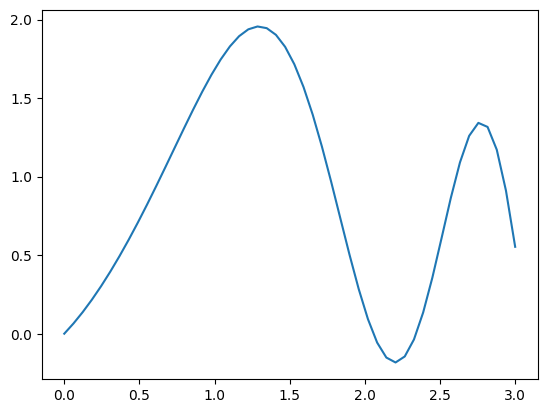

In [6]:
f = lambda x: np.sin(x) + np.sin(x**2)

x = np.linspace(0, 3)

fig, ax = plt.subplots()
ax.plot(x, f(x))

We see that there are three roots bracketed by $[-0.25, 0.25]$, $[2, 2.2]$ and $[2.2, 2.5]$. Using this we can calculate the roots using each of the methods.

In [7]:
f_prime = lambda x : np.cos(x) + 2*x*np.cos(x**2)

brackets = [(-0.25, 0.25), (1.8,2.2), (2.2,2.5)]
tol = 1e-3

for i, bracket in enumerate(brackets):
    print(f"\n\nRoot {i+1}, bracketed by {bracket}")

    x_star, iterations =  bisect(f, *bracket, tol)
    print(f"Bisection: {x_star=}, {iterations=}")
    x_star, iterations =  regula_falsi(f, *bracket, tol)
    print(f"Regula Falsi: {x_star=}, {iterations=}")
    x_star, iterations =  illinois(f, *bracket, tol)
    print(f"Illinois: {x_star=}, {iterations=}")
    x_star, iterations =  newton_raphson(f, f_prime, bracket[1], tol)
    print(f"Newton Raphson: {x_star=}, {iterations=}")



Root 1, bracketed by (-0.25, 0.25)
Bisection: x_star=0.0, iterations=1
Regula Falsi: x_star=-0.0004912201661325964, iterations=4
Illinois: x_star=-0.0003537984846328465, iterations=1
Newton Raphson: x_star=1.919188254652284e-06, iterations=3


Root 2, bracketed by (1.8, 2.2)
Bisection: x_star=2.05625, iterations=6
Regula Falsi: x_star=2.056302920791288, iterations=6
Illinois: x_star=2.056021962744859, iterations=2
Newton Raphson: x_star=-4.216054767911619, iterations=3


Root 3, bracketed by (2.2, 2.5)
Bisection: x_star=2.341796875, iterations=8
Regula Falsi: x_star=2.3414534789770234, iterations=6
Illinois: x_star=2.341520523707627, iterations=1
Newton Raphson: x_star=2.3416346242143202, iterations=3


However to see get a better idea of the convergence of each method we can choose one root and look at how many iterations are required to satisfy an increasingly stringent tolerance.

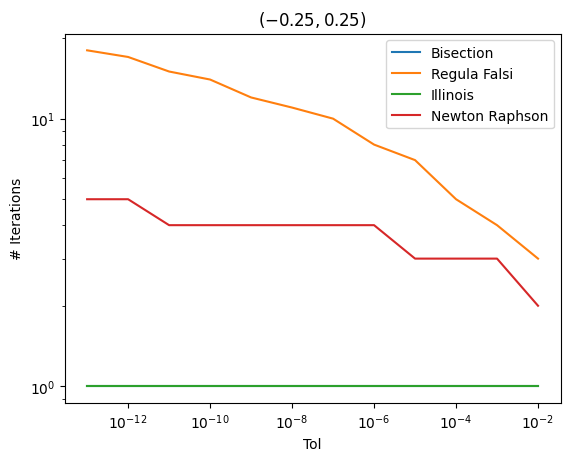

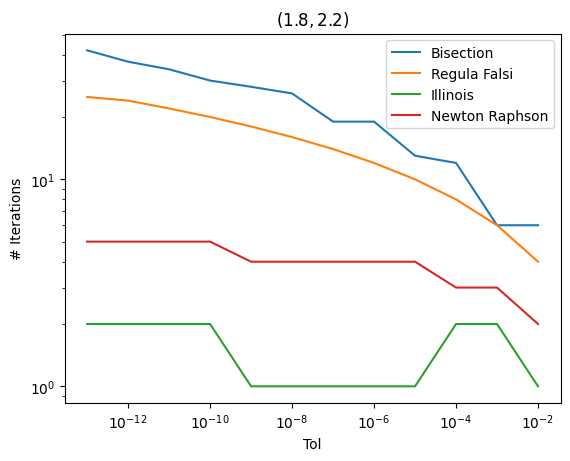

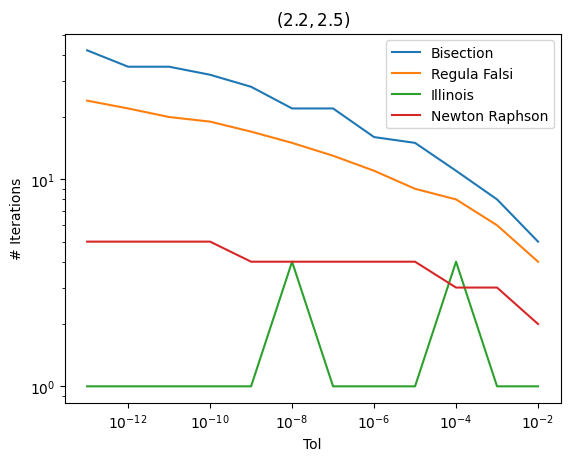

In [14]:
tols = np.logspace(-2, -13, 12)

for bracket in brackets:
    bisect_iter = []
    regula_falsi_iter = []
    illinois_iter = []
    newton_raphson_iter = []
    for tol in tols:
        bisect_iter.append(bisect(f, *bracket, tol)[1])
        regula_falsi_iter.append(regula_falsi(f, *bracket, tol)[1])
        illinois_iter.append(illinois(f, *bracket, tol)[1])
        newton_raphson_iter.append(newton_raphson(f, f_prime, bracket[1], tol)[1])
    
    fig, ax = plt.subplots()
    ax.loglog(tols, bisect_iter, label="Bisection")
    ax.loglog(tols, regula_falsi_iter, label="Regula Falsi")
    ax.loglog(tols, illinois_iter, label="Illinois")
    ax.loglog(tols, newton_raphson_iter, label="Newton Raphson")
    ax.legend()
    ax.set_xlabel("Tol")
    ax.set_ylabel("# Iterations")
    ax.set_title(f"${bracket}$")

In general, here we see that Illinois coverges fastest followed by Newton Raphson, Regula Falsi and Bisection. The exception is the first root $x=0$ where the provided bracket is symetrical about the root so the bisection method converges exactly in the first iteration.

# Question 4

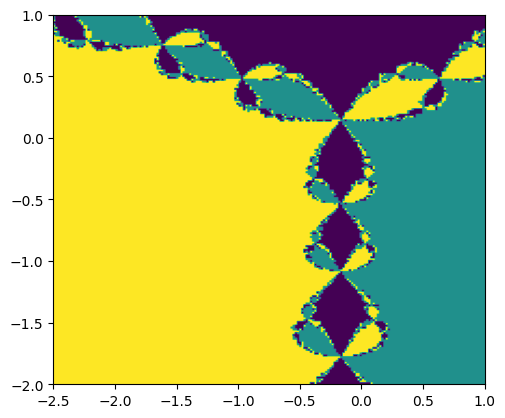

In [36]:
f = lambda z : z**3 - 1
f_prime = lambda z : 3*z**2

x = np.linspace(-2.5, 1, 200)
y = np.linspace(-2, 1, 200)

im = np.zeros((len(x), len(y)))

for i, xi in enumerate(x):
    for j, yi in enumerate(y):
        root, _ = newton_raphson(f, f_prime, x0=complex(xi, yi), tol=1e-12)

        if np.isclose(root, 1):
            im[i,j] = 1
        elif np.isclose(root, complex(-.5, np.sqrt(3)/2)):
            im[i,j] = 2
        else:
            im[i,j] = 3

plt.imshow(im, origin='lower', extent=[-2.5, 1, -2, 1])